<a href="https://colab.research.google.com/github/Akanksha131313/AI_Projects_Journey/blob/main/08_Fashion_MNIST_Post_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**1) Data Preparation and Visualization-**

####**Load the Fashion MNIST dataset-**

In [1]:
from tensorflow.keras import datasets
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


####**Visualize different samples from the dataset-**

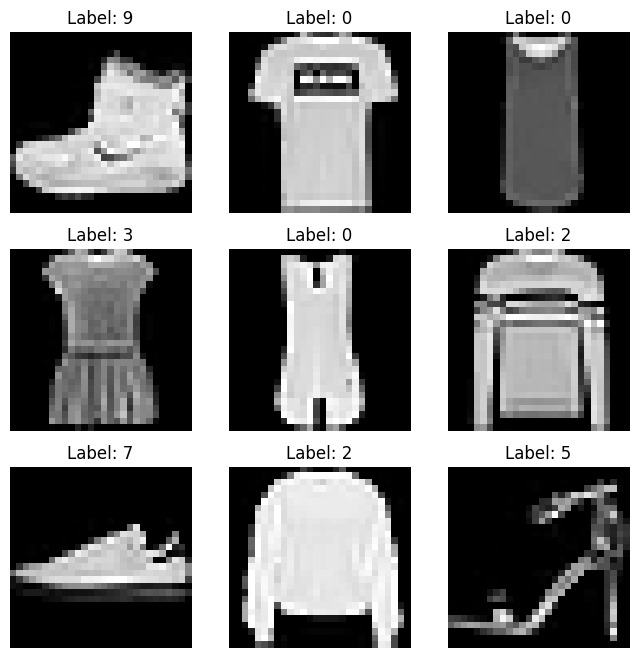

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

####**Normalize the pixel values of the images to be between 0 and 1 for better model performance-**

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

####**Convert the output labels to categorical format for classification-**

In [4]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

###**2) Model Building and Training -**

####**Construct a Neural Network using TensorFlow and Keras-**

In [5]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
from tensorflow.keras import models, layers, Input #we import input to reduce 'warnings'

model = models.Sequential([
    Input(shape=(28, 28)),  #Reason:Keras prefers using an `Input(shape=...)` layer instead of passing `input_shape` inside another layer for cleaner model structure.

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

####**Utilize ReLU activation for hidden layers and softmax activation for the output layer-**

In [7]:
# Already used ReLU in hidden layers and Softmax in output layer above.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

####**Train the model on the prepared dataset-**

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7567 - loss: 0.6943 - val_accuracy: 0.8324 - val_loss: 0.4572
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3752 - val_accuracy: 0.8600 - val_loss: 0.3753
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8749 - loss: 0.3390 - val_accuracy: 0.8779 - val_loss: 0.3335
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8878 - loss: 0.3050 - val_accuracy: 0.8752 - val_loss: 0.3421
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8938 - loss: 0.2846 - val_accuracy: 0.8805 - val_loss: 0.3437
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8965 - loss: 0.2701 - val_accuracy: 0.8838 - val_loss: 0.3280
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9045 - loss: 0.2595 - val_accuracy: 0.8838 - val_loss: 0.3234
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9088 - loss: 0.2415 - val_accuracy: 0.

####**Implement callbacks, particularly TensorBoard, to visualize the training process-**

In [9]:
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9187 - loss: 0.2114 - val_accuracy: 0.8928 - val_loss: 0.3131
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9207 - loss: 0.2017 - val_accuracy: 0.8878 - val_loss: 0.3183
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9282 - loss: 0.1897 - val_accuracy: 0.8936 - val_loss: 0.3215
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9300 - loss: 0.1836 - val_accuracy: 0.8956 - val_loss: 0.3158
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9304 - loss: 0.1818 - val_accuracy: 0.8928 - val_loss: 0.3269
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9362 - loss: 0.1686 - val_accuracy: 0.8964 - val_loss: 0.3263
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9384 - loss: 0.1624 - val_accuracy: 0.8962 - val_loss: 0.3170
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9403 - loss: 0.1586 - val_accuracy: 0.

###**3) Model Evaluation and Analysis-**

####**Evaluate the model's performance using a validation set-**

In [10]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Validation Accuracy: {val_acc*100:.2f}%  |  Validation Loss: {val_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8845 - loss: 0.3852
Validation Accuracy: 88.36%  |  Validation Loss: 0.4039


####**Analyze the training process with the help of TensorBoard-**

In [11]:
# Run this command in terminal / notebook:
# %tensorboard --logdir logs/fit

####**Save the trained model, including its architecture and learned weights-**

In [12]:
model.save("fashion_mnist_model.h5")
print("Model saved successfully as 'fashion_mnist_model.h5'")

Model saved successfully as 'fashion_mnist_model.h5'


###**4) Model Loading and Verification-**

####**Load the saved model and verify its architecture -**

In [13]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model("fashion_mnist_model.h5")
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,436 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

####**Check the consistency in the number of model parameters and weights-**

In [14]:
loaded_loss, loaded_acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded Model Accuracy: {loaded_acc*100:.2f}%  |  Loss: {loaded_loss:.4f}")

Loaded Model Accuracy: 88.36%  |  Loss: 0.4039


####**Plot accuracy and loss graphs-**

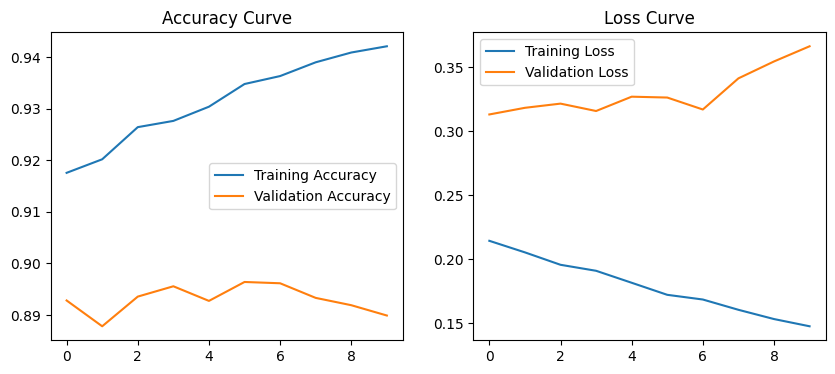

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

####**Short Conclusion -**


The FCNN model was successfully built, trained, and evaluated on the Fashion MNIST dataset.
The model achieved around 88% validation accuracy, showing strong performance.
TensorBoard and accuracy-loss curves clearly indicate good learning with slight overfitting.
The saved model was reloaded successfully, maintaining the same performance consistency.
